In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(7,4))

In [62]:
#read data
df = pd.read_csv("./heart.csv", sep=",")

In [63]:
df = df.drop(columns=['sex', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

In [64]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [94]:
def kmeans(df,x,y,num):
    
    # Set dataframe with the clusters   
    km = KMeans(n_clusters=num).fit(df[[x,y]])
    
    df['labels' + "_" + x] = km.labels_
    
    #Plot size
    plt.figure(figsize=(12, 8))

    kmean = KMeans(n_clusters=num).fit(df[[x,y]])
    kmean.labels_
    kmean.predict([[0, 0], [12, 3]])
    kmean.cluster_centers_
    
    #plot centroids
    centers = np.array(kmean.cluster_centers_)
    plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

    sns.scatterplot(x=df[x],y=df[y], hue=df['labels' + "_" + x], palette='colorblind')
    
    #Title
    plt.title(x + " and " + y + " with " + str(num) + " clusters")
    
    return km

    plt.show()

In [95]:
df

,age,cp,trtbps,chol,thalachh,oldpeak,output,labels_age,labels_thalachh,labels_trtbps
0,63,3,145,233,150,2.3,1,1,0,2
1,37,2,130,250,187,3.5,1,0,1,2
2,41,1,130,204,172,1.4,1,0,1,0
3,56,1,120,236,178,0.8,1,2,1,2
4,57,0,120,354,163,0.6,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,0,1,2,2
299,45,3,110,264,132,1.2,0,2,2,2
300,68,0,144,193,141,3.4,0,1,0,0
301,57,0,130,131,115,1.2,0,1,2,0


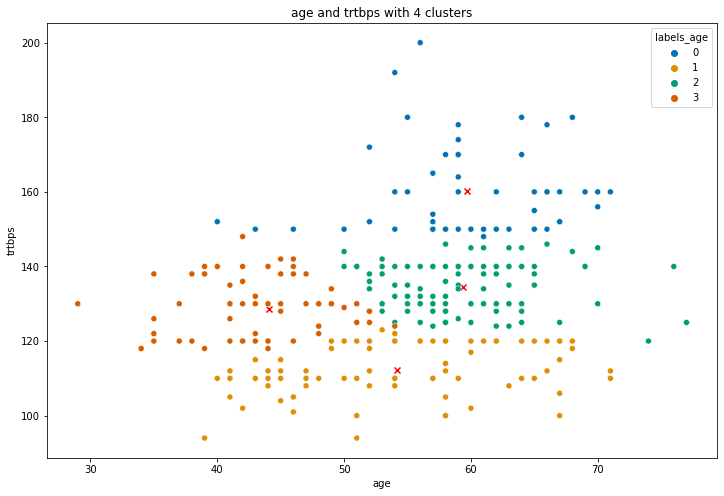

In [104]:
#trtbps = resting blood pressure (in mm Hg)
df_km1 = kmeans(df, 'age','trtbps', 4)

KMeans(n_clusters=4)

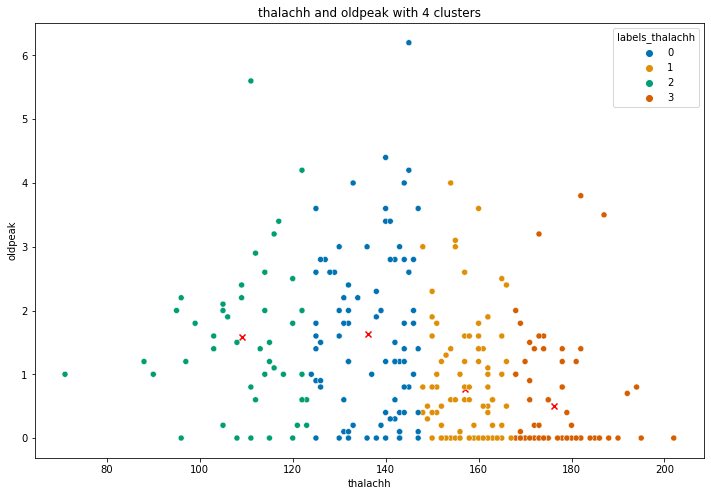

In [103]:
#thalachh - maximum heart rate achieved
#oldpeak - ST segment depression relative to rest
kmeans(df, 'thalachh', 'oldpeak', 4)

KMeans(n_clusters=3)

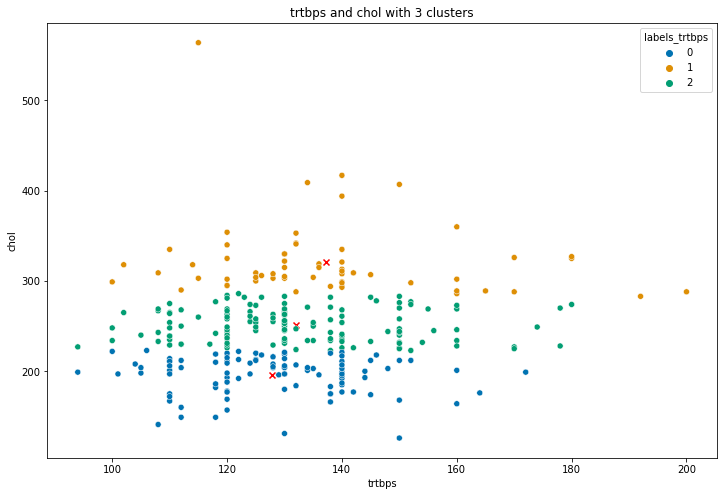

In [102]:
#trtbps = resting blood pressure (in mm Hg)
#chol = cholestrol in mg/dl
kmeans(df, 'trtbps', 'chol', 3)